<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/05_window_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting the environment

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 20.8 MB/s eta 0:00:00


In [ ]:
from dataclasses import dataclass

import numpy as np
import pooch
import rasterio as rio
from tqdm import tqdm

In [ ]:
sentinel2_img = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/raster/oromocto_jun2021_composite.tif',
    known_hash='e08df41e0f301d684f9ed1a487b9abccaf431fd3df25fa5f10da82d44e6b733d'
)

# Change the block size

In [ ]:
!rio convert '/root/.cache/pooch/1b7989bb99434afca6e9eaa37ae6579a-oromocto_jun2021_composite.tif' 'oromocto_jun2021_composite_64x64.tif' --co tiled=true --co blockxsize=64 --co blockysize=64 --overwrite

# Read / Write - Window based

In [ ]:
@dataclass
class SGDataset:
    r: np.ndarray
    nir: np.ndarray

In [ ]:
with rio.open('oromocto_jun2021_composite_64x64.tif') as src:

    windows = list(src.block_windows())
    print(len(windows))

    cfg = src.profile | dict(count=1)
    with rio.open('ndvi.tif', 'w', **cfg) as out:

        for ix, window in tqdm(windows):
            data = SGDataset(*src.read([3, 7], window=window))
            ndvi = (data.nir - data.r) / (data.nir + data.r)
            out.write(ndvi, 1, window=window)

100


100%|██████████| 100/100 [00:00<00:00, 201.74it/s]


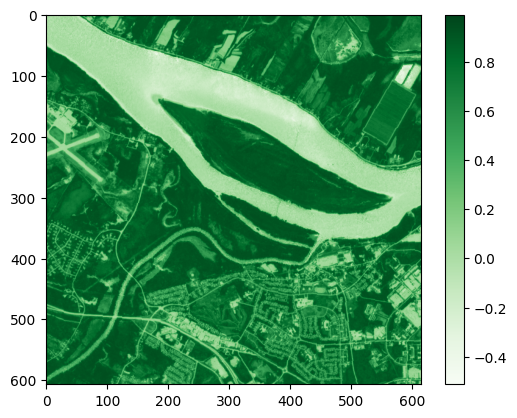

In [ ]:
import matplotlib.pyplot as plt

with rio.open('ndvi.tif') as src:
    plt.imshow(src.read(1), cmap='Greens')
    plt.colorbar();

# Full Code

In [ ]:
"""
Vaasudevan Srinivasan 🧑🏻‍💻
StratagemGIS Solutions
Script to generate NDVI in a window-based read / write approach
"""

# !rio convert \
#     'oromocto_jun2021_composite.tif' \
#     'oromocto_jun2021_composite_64x64.tif' \
#     --co tiled=true --co blockxsize=64 --co blockysize=64


from dataclasses import dataclass

import numpy as np
import pooch
import rasterio as rio
from tqdm import tqdm


@dataclass
class SGDataset:
    r: np.ndarray
    nir: np.ndarray


with rio.open('oromocto_jun2021_composite_64x64.tif') as src:

    windows = list(src.block_windows())
    print(len(windows))  # 100

    cfg = src.profile | dict(count=1)
    with rio.open('ndvi.tif', 'w', **cfg) as out:

        for ix, window in tqdm(windows):
            data = SGDataset(*src.read([3, 7], window=window))
            ndvi = (data.nir - data.r) / (data.nir + data.r)  # (64, 64)
            out.write(ndvi, 1, window=window)

100


100%|██████████| 100/100 [00:00<00:00, 136.38it/s]
